# TASCA M4 T01.- VISUALITZACIÓ GRÀFICA DE DADES

- Exercici 1
Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

Una variable categòrica (Districte o Barri)
Una variable numèrica (Preu)
Una variable numèrica i una categòrica (Districte i Preu)
Dues variables numèriques (Any o Trimestre i Preu)
Tres variables (Barri o Districte, Trimestre i Preu)

- Exercici 2
Exporta els gràfics com imatges o com HTML.

- Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant.

### Exercici 1: Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import scipy.stats
%matplotlib inline


In [3]:
cd /Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT_4/ # Busco la carpeta on he descarregat l'arxiu.

/Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT_4


In [4]:
PL = pd.read_csv('preu_lloguer_per_trimestre_i_barri.csv') # Creo el df PL important l'arxiu excel.

* Un cop descarregat l'arxiu, em disposo a analitzar els continguts del mateix: Primer miro el tipus de dades, després visualitzo la taula, i després intento identificar si hi ha errors que poden causar desviacions a l'hora d'analitzar les dades.

In [5]:
# primera visualització de contigut per tipus de contingut y columnes.
PL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [9]:
# Visulaització de la taula.
pd.set_option('display.max.columns', None)
PL

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [11]:
# Detecció de valors NaN
PL.isna().sum().sum()

0

In [12]:
# Detecció d'strings a la columna preu 
PL.Preu.str.contains('--').value_counts()

False    540
True      44
Name: Preu, dtype: int64

In [14]:
# Conversió del les categories Objecte a Float
PL['Preu'] = pd.to_numeric(PL['Preu'],errors = 'coerce')
(PL['Preu'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 584 entries, 0 to 583
Series name: Preu
Non-Null Count  Dtype  
--------------  -----  
540 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


## Crea almenys una visualització per:

### Una variable categòrica per districte (Districte o Barri)


In [ ]:
# Converteixo algunes variables Objecte a categòriques per assegurar els resultats de les gràfiques

In [15]:
tipu = {'Nom_Districte':'category',
         'Nom_Barri':'category',
         'Lloguer_mitja':'category'}
PL.astype(tipu).dtypes

Any                  int64
Trimestre            int64
Codi_Districte       int64
Nom_Districte     category
Codi_Barri           int64
Nom_Barri         category
Lloguer_mitja     category
Preu               float64
dtype: object

* Preparo el Df per tal d'obtenir les dades per nom de districte i mostrar una gràfica de Pastís. Aquesta gràfica és molt visual i senzilla, ideal per mostrar aquesta variable categòrica.

In [27]:
ds_conta = PL['Nom_Districte'].value_counts() # creo DF per obtenir el total de valors de cada districte.
ds_conta

Nou Barris             104
Horta-Guinardó          88
Sant Martí              80
Sants-Montjuïc          64
Sant Andreu             56
Eixample                48
Sarrià-Sant Gervasi     48
Gràcia                  40
Ciutat Vella            32
Les Corts               24
Name: Nom_Districte, dtype: int64

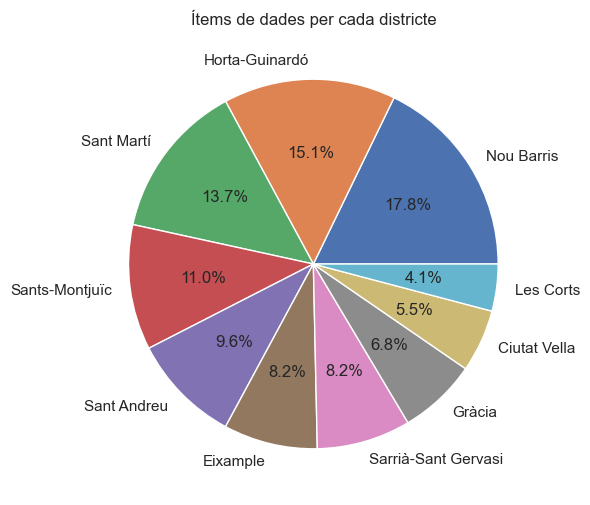

<Figure size 640x480 with 0 Axes>

In [273]:
# Creo un gràfic de pastís per una sola variable Categòrica.
plt.figure(figsize=(6, 6)) # donc el format de tamany
plt.pie(ds_conta, labels=ds_conta.index, autopct='%1.1f%%') # afegeixo noms index amb funció de percentatges dins
plt.title('Ítems de dades per cada districte') # donc nom al títol de la gràfica

plt.show() # mostro la gràfica 
plt.savefig('Gràfic_items_Districte') # exporto la gràfica i la guardo en format png.

* En aquesta gràfica podem observar fàcilment quantes dades tenim per cada districte.

### Una variable categòrica (per preu)

* Escullo una gràfica de barres per mostrar la quantitat d'ítems que tenim per cada franja de preu de lloguer

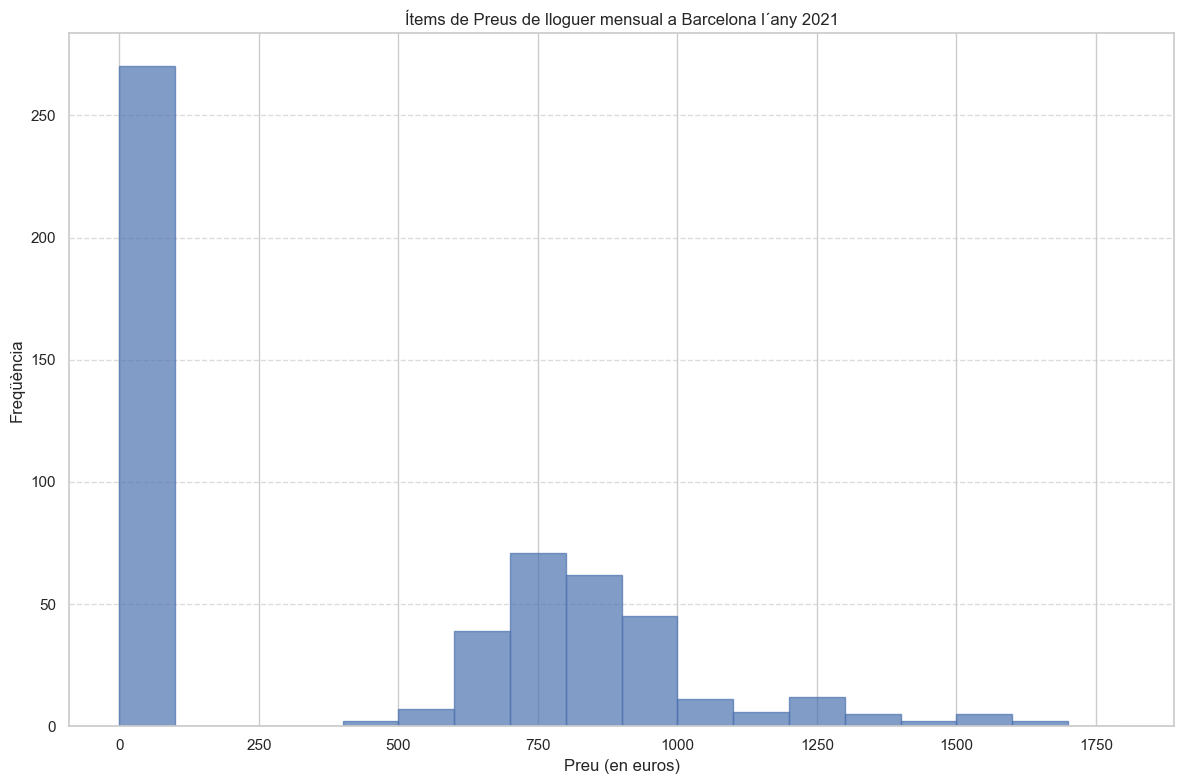

In [272]:
sns.set(style="whitegrid") # estil de gràfica i fons
plt.figure(figsize=(12, 8)) # donc tamany a la figura
plt.hist(PL['Preu'], bins=[x*100 for x in range(int(PL['Preu'].max() / 100) + 1)], alpha=0.7, edgecolor='b')
# Histograma de preus en intervals de 100 euros i deixant marge de 100 més per assegurar que entren a la gràfica
plt.title('Ítems de Preus de lloguer mensual a Barcelona l´any 2021')
plt.xlabel('Preu (en euros)') # etiqueto x
plt.ylabel('Freqüència') # etiqueto Y
plt.grid(axis='y', linestyle='--', alpha=0.7) # donc estil a la graella
plt.tight_layout()

* Es detecta problema en la franja 0-100€ que no té res a veure amb els errors NaN eliminats. Tampoc s'aprecien alguns valors de preu que arriven a lloguer 1800.

* Es tracta d'una nomalia que no havia detectat abans. Aquests valors tant baixos que corresponen a la pregunta preu, no poden tenir relació amb els valors Nan, doncs ja els he buscat i no n'hi havien. I tampoc amb els string que ja estàn corretgits. 
* Vull comprobar si hi ha valors barrejats i per tant busco a la columna on consta la descripció dels valors.

In [34]:
PL['Lloguer_mitja'].value_counts() # miro quants valors diferents conté la descripció de Lloguer_mitjà.

Lloguer mitjà mensual (Euros/mes)              292
Lloguer mitjà per superfície (Euros/m2 mes)    292
Name: Lloguer_mitja, dtype: int64

* Veig descripcions diferents que justifiquen la diferència tant abismal de valors a la columna de Preu.
* Observo que hi ha valors diferents dins de la columna lloguer_mitjà. Casualment enseguida em mostra una simetria perquè hi ha la mateixa quantitat de cada descripció. 
* Em queda detectar si hi ha alguna relació entre els districtes per exemple.

In [271]:
files_filtrades_sup = PL[PL['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)'] # filtro les columnes amb la primera descripció dels dos resultats obtinguts de la columna lloguer_mitja.
files_filtrades_sup['Nom_Districte'].value_counts()

Nou Barris             52
Horta-Guinardó         44
Sant Martí             40
Sants-Montjuïc         32
Sant Andreu            28
Eixample               24
Sarrià-Sant Gervasi    24
Gràcia                 20
Ciutat Vella           16
Les Corts              12
Name: Nom_Districte, dtype: int64

In [37]:
files_filtrades_mes = PL[PL['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'] filtro les columnes amb la segona descripció dels dos resultats obtinguts de la columna lloguer_mitja.
files_filtrades_mes['Nom_Districte'].value_counts()

Nou Barris             52
Horta-Guinardó         44
Sant Martí             40
Sants-Montjuïc         32
Sant Andreu            28
Eixample               24
Sarrià-Sant Gervasi    24
Gràcia                 20
Ciutat Vella           16
Les Corts              12
Name: Nom_Districte, dtype: int64

* Amb aquesta comparativa observem que hi ha la mateixa freqüència de resultats per cada districte. El que em dóna a entendre que simplent, es tracta d'una columna desplaçada o que hauria d'haver existit independent i això ha creat el doble de files i que són idèntiques, doncs duplicades.

* Em disposo a dividir la columna en dos columnes diferents, per tal de separar els valors que corresponen a cada una.

In [242]:
# Faig un nou DF nou amb les columnes necessaries i demano pivotarles per tal de crear-ne de noves i afegeixo unstack perquè les indexi de nou
PLOK = PL.groupby(['Any','Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja'])['Preu'].agg('first').unstack()

# Reinici l'index per tenir df net
PLOK = PLOK.reset_index()

# Renombro les columnes amb els noms curts i que diferencin molt bé les dos columnes
PLOK = PLOK.rename(columns={'Lloguer mitjà mensual (Euros/mes)': 'Preu_mensual',
                             'Lloguer mitjà per superfície (Euros/m2 mes)': 'Preu_m2'})
PLOK.columns.name = None
PLOK

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_mensual,Preu_m2
0,2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3
4,2021,1,2,Eixample,5,el Fort Pienc,918.0,12.9
...,...,...,...,...,...,...,...,...
287,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1205.3,15.2
288,2021,4,10,Sant Martí,70,el Besòs i el Maresme,700.5,10.8
289,2021,4,10,Sant Martí,71,Provençals del Poblenou,977.8,13.8
290,2021,4,10,Sant Martí,72,Sant Martí de Provençals,826.2,11.7


* Aprecio que les columnes s'han separat degudament doncs, es mostra la meitat de la taula original i apareixen les dos columnes.

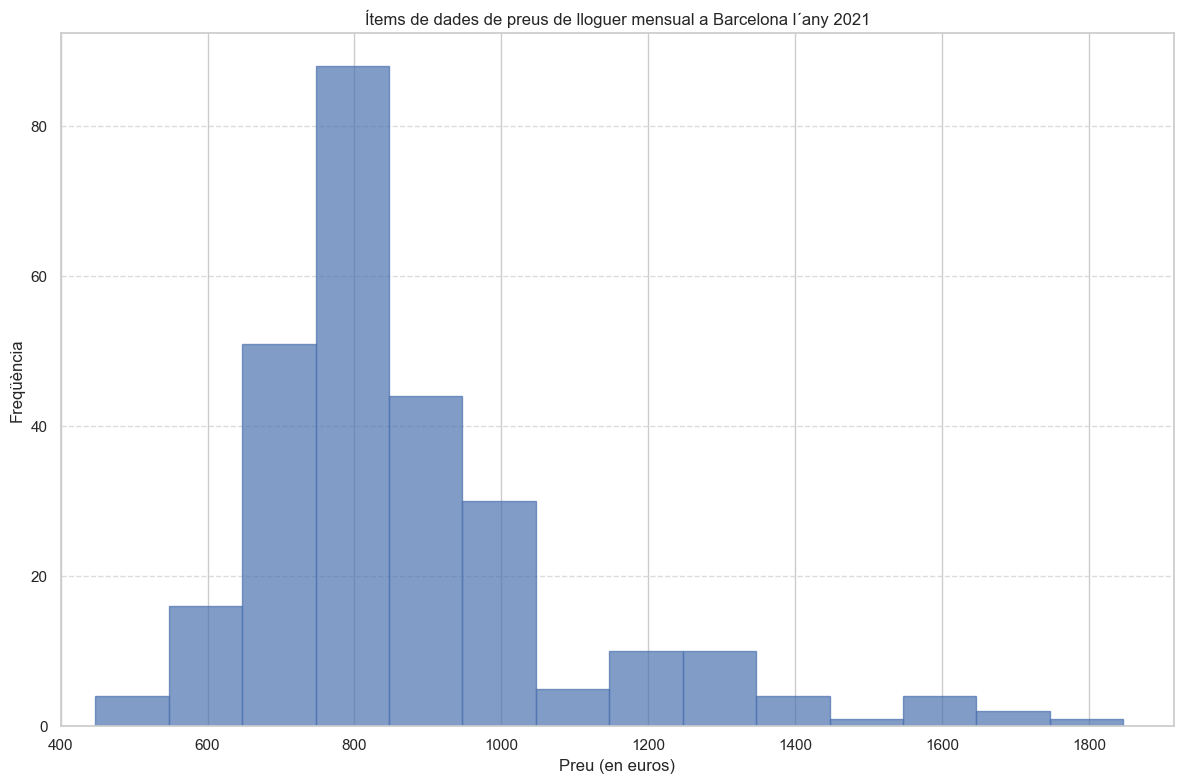

<Figure size 640x480 with 0 Axes>

In [275]:
sns.set(style="whitegrid")

# Defineixo els bins i s'afegeixen 100 per si a l'arrodonir, assegurar que surten tots els preus.
preu_min = int(PLOK['Preu_mensual'].min())
preu_max = int(PLOK['Preu_mensual'].max())
bins = list(range(preu_min, preu_max + 101, 100))


plt.figure(figsize=(12, 8))
plt.hist(PLOK['Preu_mensual'], bins=bins, alpha=0.7, edgecolor='b', color='b')

plt.title('Ítems de dades de preus de lloguer mensual a Barcelona l´any 2021')
plt.xlabel('Preu (en euros)')
plt.ylabel('Freqüència')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(preu_min, preu_max) # Limito eix x als valors mínims i màxims de preu.
# marco que l'eix X comenci al 400 doncs he comprobat que no hi ha valors per sota
plt.xlim(400, preu_max + 100)
plt.tight_layout()

plt.show()
plt.savefig('Gràfic _Preu_lloguer')

* Ara ja veiem un histogràma més llògic, on els valors de preu comencen a partir del 400 i pico, que ja són preus mensuals i no com abans que mostrava preus per m2.

### Una variable numèrica i una categòrica (Districte i Preu)

* Per crear una gràfica representativa de dos variables, quan una és categòrica i l'altre numèrica, opto per un boxplot, per tal de que sigui senzilla i visual.

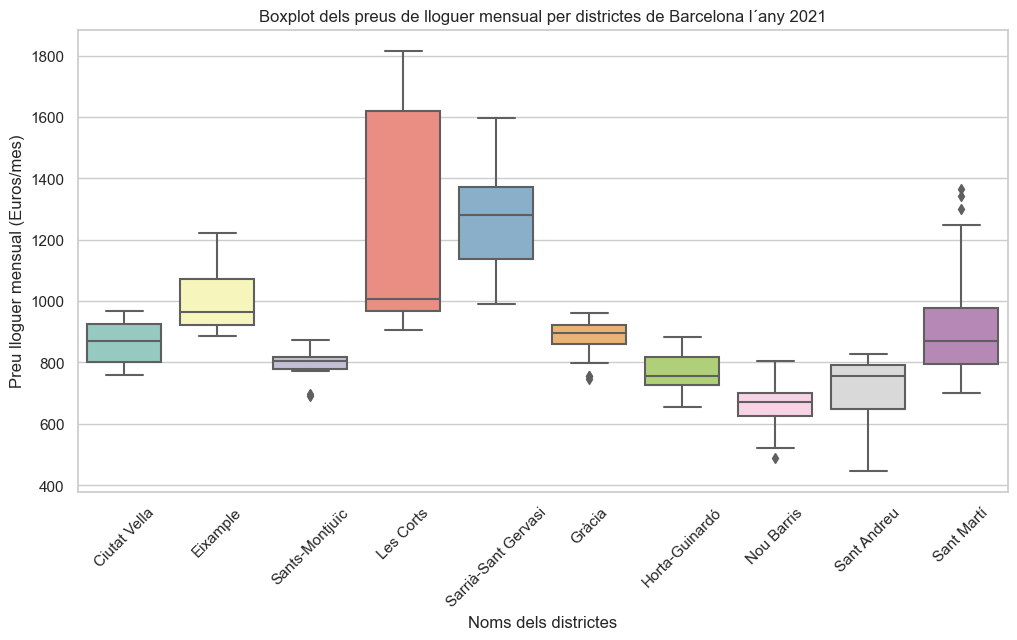

<Figure size 640x480 with 0 Axes>

In [280]:
sns.set(style="whitegrid") # Estil de la gràfica amb fons blanc

plt.figure(figsize=(12, 6)) # mides de la gràfica 
sns.boxplot(x="Nom_Districte", y="Preu_mensual", data=PLOK, palette="Set3") # valors i estils de color de les barres.

plt.title('Boxplot dels preus de lloguer mensual per districtes de Barcelona l´any 2021') # nom de la gràfica
plt.xlabel('Noms dels districtes')
plt.ylabel('Preu lloguer mensual (Euros/mes)')
plt.xticks(rotation=45) # roto etiquetes per guanyar espai.

plt.show()
plt.savefig('Boxplot_distribució_lloguer_districtes')

* En aquesta gràfica s'aprecia millor, doncs puc veure els intervals de preus i les mitges.

### Dues variables numèriques (Any o Trimestre i Preu) 

* Faig un gràfic de barres senzill per aquestes dos variables numèriques.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


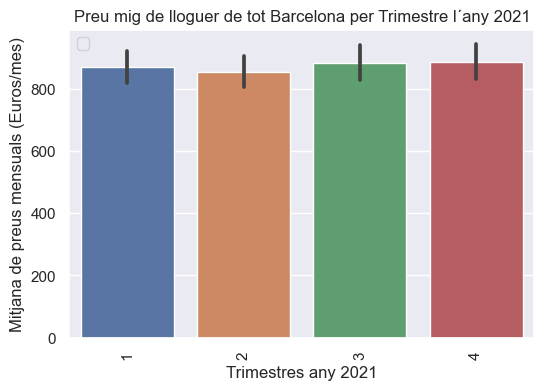

<Figure size 640x480 with 0 Axes>

In [289]:
sns.set()
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Trimestre', y='Preu_mensual', data=PLOK)
ax.legend(loc='upper left') 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Preu mig de lloguer de tot Barcelona per Trimestre l´any 2021')
plt.xlabel('Trimestres any 2021')
plt.ylabel('Mitjana de preus mensuals (Euros/mes)')
plt.show()
plt.savefig('Gràfic_trimestre')

* Aquí puc observar que només s'aprecia un lleuger descencs al segon trimestre i lleu augment de preu els dos últims trimestres de l'any i segur que si miressim els primers mesos del 2022, seguirien pujant lleument. Doncs cada any, els propietaris pugen els preus, tot i que amb la nova normativa LAU, les limitacions de l'augment de l'IPC fan que no es dispari.

### Crea Tres variables (Barri o Districte, Trimestre i Preu)



* Em plantejo crear un barplot per mostrar aquestes tres variables. De moment és amb la gràfica que estic més habituada. ja veurem si expressa els resultats de manera clara i precisa.

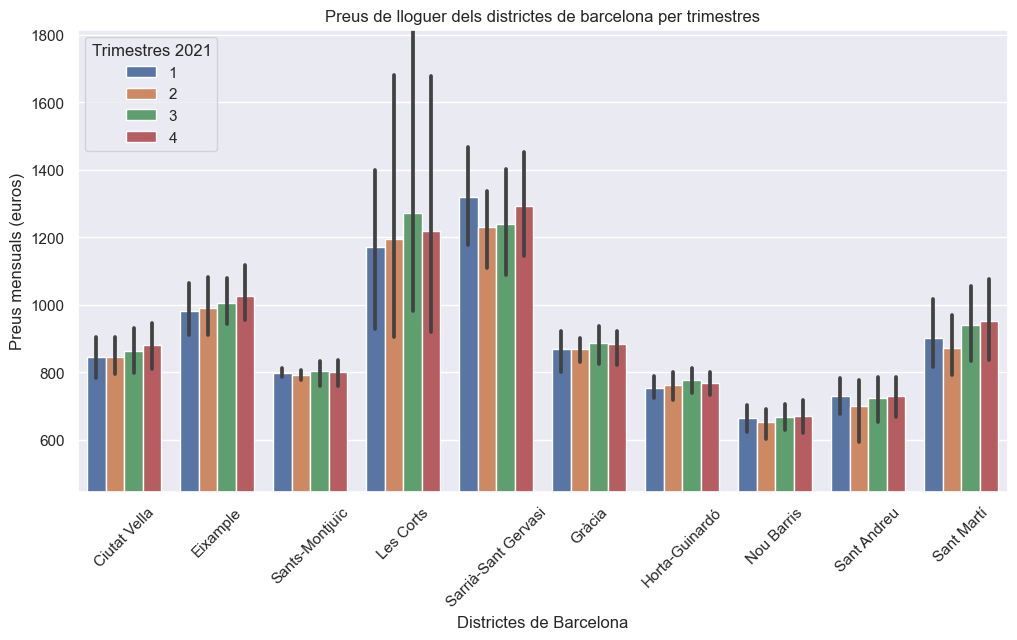

<Figure size 640x480 with 0 Axes>

In [229]:
sns.set()
preu_min = int(PLOK['Preu_mensual'].min())
preu_max = int(PLOK['Preu_mensual'].max())
bins = [x for x in range(preu_min, preu_max + 101, 100)] 


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Nom_Districte', y='Preu_mensual', hue='Trimestre', data=PLOK)
ax.legend(loc='upper left', title='Trimestres 2021')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(rotation=45)
plt.title('Preus de lloguer dels districtes de barcelona per trimestres')
plt.xlabel('Districtes de Barcelona')
plt.ylabel('Preus mensuals (euros)')
plt.ylim(preu_min, preu_max)

plt.show()
plt.savefig('Barplot_Preu_Districte_Trimestre')

* En aquesta gràfica s'aprecia força bé la distribució de preus per districte i aquesta similitud de preus als 4 trimestres de l'any. Però al meu entendre, falta precisió per detectar les densitats de preus i distribució de valors minims i màxims per districte.

* Amb un lmplot, podré mostrar aquesta precisió que trobo a faltar 

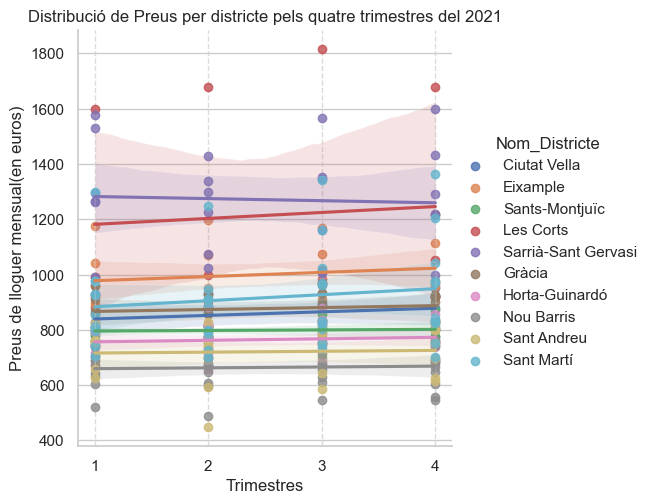

<Figure size 640x480 with 0 Axes>

In [334]:
sns.lmplot(x='Trimestre', y='Preu_mensual', hue='Nom_Districte', data=PLOK)

plt.title('Distribució de Preus per districte pels quatre trimestres del 2021')
plt.xticks(range(1, 5)) 
plt.xlabel('Trimestres')
plt.ylabel('Preus de lloguer mensual(en euros)')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()
plt.savefig('lmplot_Preu_Districte_Trimestre')

* Aquesta gràfica expresa molt bé la diferència de preus per trimestres, cosa que no passava en altres gràfiques. Per exemple, en els districtes de les Corts o Sarrià-Sant Gervasi, la diferència entre trimestres és molt més remarcable. També hem d'entendre que si els índex de mercat mostren els resultats de l'increment d'IPC al més d'Agost i correspon en un % d'augment, es noti més l'augment en índex de preu de lloguer més alts.

### Exercici 3
### Proposa alguna visualització que creguis que pot resultar interessant.

Tinc curiositat per saber si hi ha uniformitat de preus de lloguer en els barris que composen un mateix districte. Així que faré un gràfic de distribució de preus per barris i agafaré el districte amb preus més alts.

In [307]:
PLOK[PLOK['Nom_Districte'] == 'Sarrià-Sant Gervasi']['Nom_Barri'].unique() # pas prescindible però que em dóna seguretat per saber que vaig per bon camí.

array(['Vallvidrera, el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró'], dtype=object)

In [308]:
B_Sarria = PLOK[PLOK['Nom_Districte'] == 'Sarrià-Sant Gervasi']

* Faig una gràfica boxplot per visualitzar la distribució de preus per barris del districte de Sarrià-Sant Gervasi.

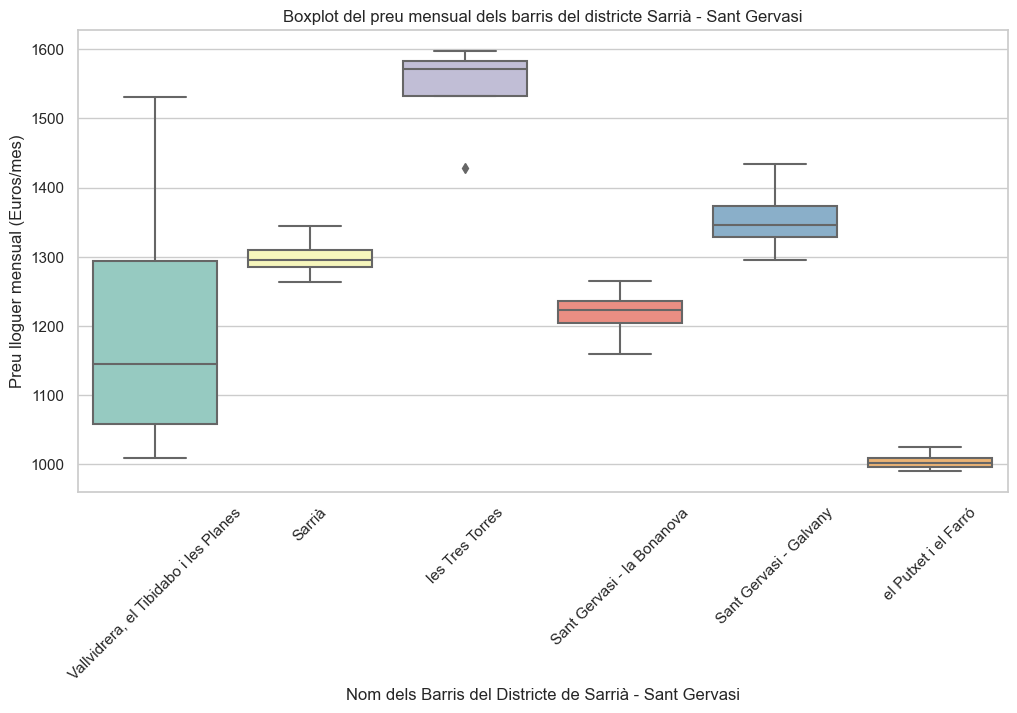

<Figure size 640x480 with 0 Axes>

In [309]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x="Nom_Barri", y="Preu_mensual", data=B_Sarria, palette="Set3",)
plt.title('Boxplot del preu mensual dels barris del districte Sarrià - Sant Gervasi')
plt.xlabel('Nom dels Barris del Districte de Sarrià - Sant Gervasi')
plt.ylabel('Preu lloguer mensual (Euros/mes)')
plt.xticks(rotation=45) 

plt.show()
plt.savefig('Boxplot_Preu_Barri_Sarria')

* En aquest gràfic s'aprecia bastant la distribució de preus, però he pensat que potser amb punts, veurem millor les densitats. Així que creo un disseny diferent del gràfic.

/var/folders/b5/qd0s7b0d7cg48d0n9kg8c6lr0000gn/T/ipykernel_31092/3881646332.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Nom_Barri", y="Preu_mensual", data=B_Sarria, palette="Set3", jitter=True)


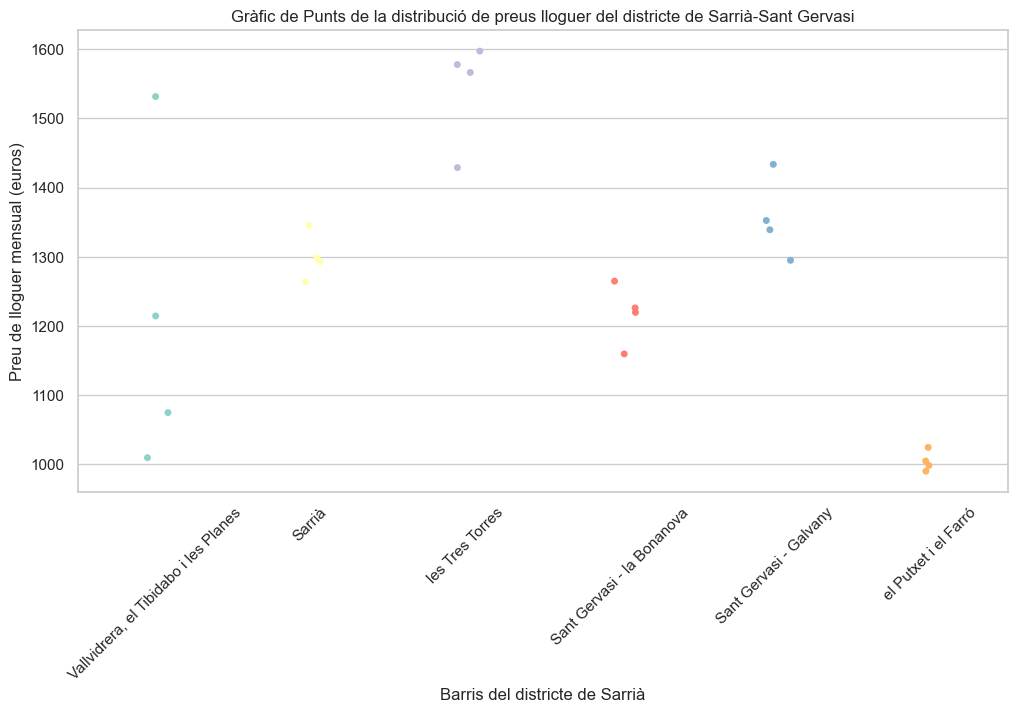

<Figure size 640x480 with 0 Axes>

In [330]:
sns.set(style="whitegrid")

# Crear un gráfico de puntos (strip plot) en lugar de un boxplot
plt.figure(figsize=(12, 6))
sns.stripplot(x="Nom_Barri", y="Preu_mensual", data=B_Sarria, palette="Set3", jitter=True)
plt.title('Gràfic de Punts de la distribució de preus lloguer del districte de Sarrià-Sant Gervasi')
plt.xlabel('Barris del districte de Sarrià')
plt.ylabel('Preu de lloguer mensual (euros)')
plt.xticks(rotation=45)
plt.show()
plt.savefig('Stripplot_Preu_Barri_Sarria')

* En aquest gràfic, tot i que es veu millor la districució de preus, dóna la sensació de no optar amb masses dades.
* Ara, per finalitzar faré el mateix gràfic de punts però d'un parell de districtes diferents.

In [310]:
PLOK[PLOK['Nom_Districte'] == 'Sant Andreu']['Nom_Barri'].unique()

array(['la Trinitat Vella', 'Baró de Viver', 'el Bon Pastor',
       'Sant Andreu', 'la Sagrera', 'el Congrés i els Indians', 'Navas'],
      dtype=object)

In [311]:
B_Sant_Andreu = PLOK[PLOK['Nom_Districte'] == 'Sant Andreu']

/var/folders/b5/qd0s7b0d7cg48d0n9kg8c6lr0000gn/T/ipykernel_31092/3702684121.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Nom_Barri", y="Preu_mensual", data=B_Sant_Andreu, palette="Set3", jitter=True)


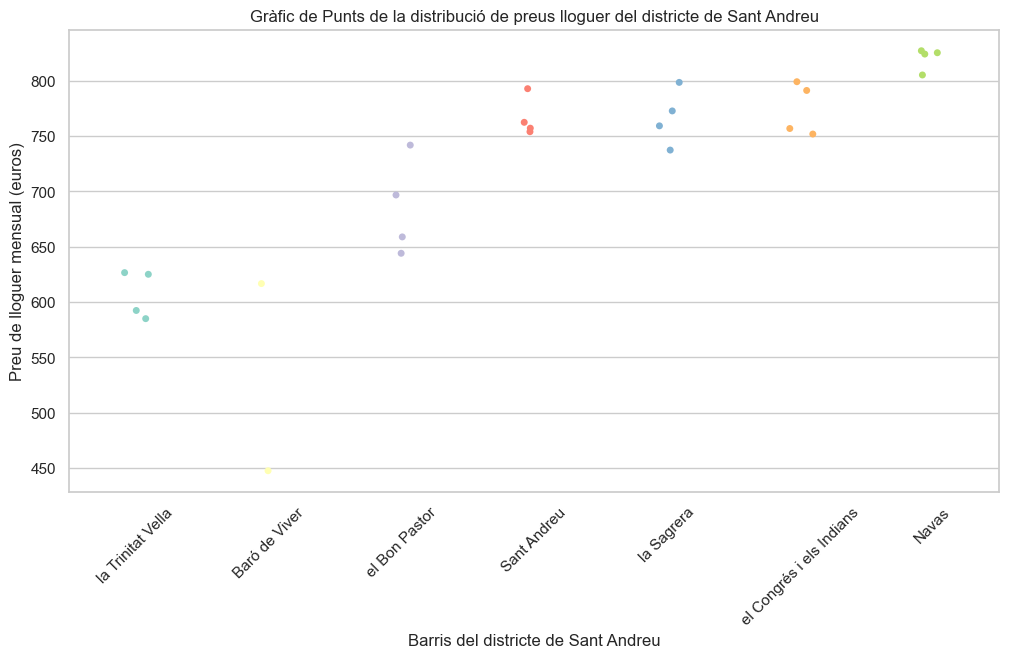

<Figure size 640x480 with 0 Axes>

In [331]:
sns.set(style="whitegrid")

# Crear un gráfico de puntos (strip plot) en lugar de un boxplot
plt.figure(figsize=(12, 6))
sns.stripplot(x="Nom_Barri", y="Preu_mensual", data=B_Sant_Andreu, palette="Set3", jitter=True)
plt.title('Gràfic de Punts de la distribució de preus lloguer del districte de Sant Andreu')
plt.xlabel('Barris del districte de Sant Andreu')
plt.ylabel('Preu de lloguer mensual (euros)')
plt.xticks(rotation=45)
plt.show()
plt.savefig('Stripplot_Preu_Barri_Sant_Andreu')

* El gràfic ens mostra que els barris amb preus de lloguers més baixos estan concentrats a la perifèria del casc antic de Sant Andreu. Però que a mesura que ens acostem cap al centre de Barcelona, aquests preus van augmentant lleugerament. Queda molt clar que hi ha diferents tipus de perifèria: la obrera i la zona alta on antigament hi havia segones residencies on s'estiuejava.

* Ara per acabar, sel·lecciono el districte amb més nombre de dades, per tal de veure la gràfica amb més contingut i poder fer una comparativa més fiable.

In [316]:
B_Horta = PLOK[PLOK['Nom_Districte'] == 'Horta-Guinardó']

/var/folders/b5/qd0s7b0d7cg48d0n9kg8c6lr0000gn/T/ipykernel_31092/2421362983.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Nom_Barri", y="Preu_mensual", data=B_Horta, palette="Set3", jitter=True)


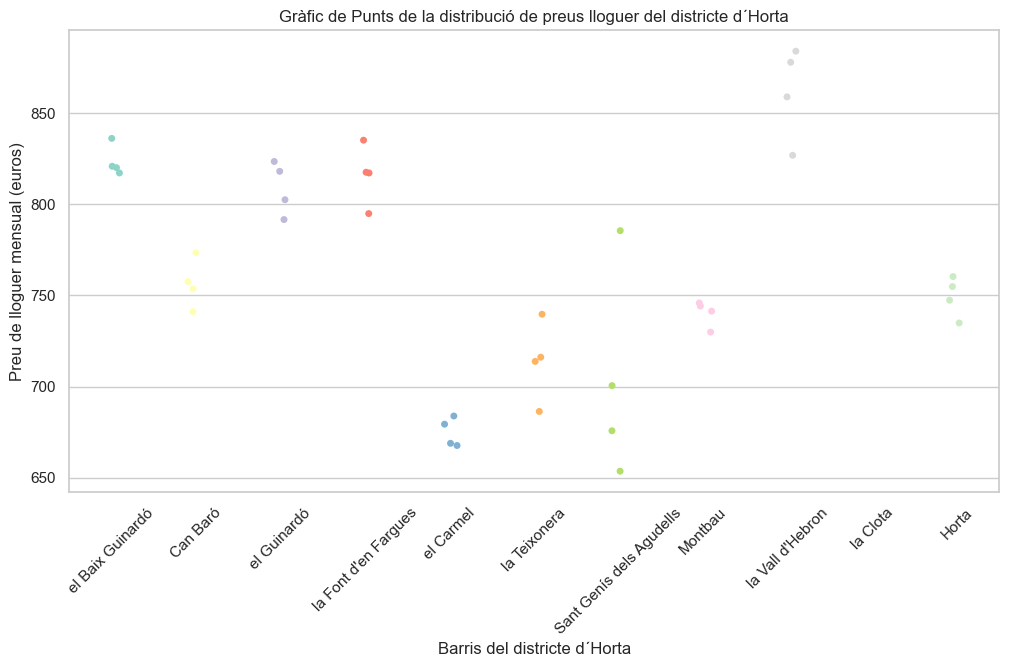

<Figure size 640x480 with 0 Axes>

In [327]:
sns.set(style="whitegrid")

# Crear un gráfico de puntos (strip plot) en lugar de un boxplot
plt.figure(figsize=(12, 6))
sns.stripplot(x="Nom_Barri", y="Preu_mensual", data=B_Horta, palette="Set3", jitter=True)
plt.title('Gràfic de Punts de la distribució de preus lloguer del districte d´Horta')
plt.xlabel('Barris del districte d´Horta')
plt.ylabel('Preu de lloguer mensual (euros)')
plt.xticks(rotation=45)
plt.show()
plt.savefig('Stripplot_Preu_Barri_Sant_Andreu')

* En aquesta gràfica , on tenim més Ítems, podem veure una distribució de preus ben diferent. La zona amb preus més alts estàn a la Vall d'Hebron, casualment on hi ha un dels millors hospitals de Barcelona i d'Espanya. I és extrany que per exemple, el barri de la Teixonera, és dels que tingui els preus més baixos. 
* Però és molt simple, doncs el barri de la Teixonera és més antic i es situa en una zona de montanya amb pujades i baixades on els serveis són mínims. Encanvi la Vall d'Hebron, és un barri nou amb molts més transport i construccions més noves.

### Exercici 2
Exporta els gràfics com imatges o com HTML.

He exportat els gràfics a mesura que els he anat visualitzant. Discriminant algun que no m'ha acabat de fer el pes.